# 1. Préliminaires

## 1.1. Imports

In [1]:
# Importation des librairies

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.collections import  LineCollection
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## 1.2. Chargement des données

In [2]:
# Chargement des données
df = pd.read_csv('./data/my_courses.csv',decimal=".",index_col=0)

#affichage des 5 premières lignes
df.head()

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
titreCours,,,,,,,,,,
Classez_et_segmentez_des_données_visuelles,29,34,NaN,15.0,3,11,0.666667,3,22,4470531
Initiez-vous_à_la_statistique_inférentielle,55,4,86.0,12.0,2,21,0.750000,4,8,4525306
Maîtrisez_les_bases_des_probabilités,60,100,NaN,NaN,1,1,NaN,0,89,4525296
Découvrez_les_librairies_Python_pour_la_Data_Science,64,64,96.0,10.0,2,8,0.000000,2,57,4452741
Devenez_mentor_sur_OpenClassrooms,76,100,91.0,6.0,1,12,1.000000,3,29,3595541


# 2. Préparation des données

## 2.1 Vérification rapide

In [3]:
# affichage de la taille du tableau
df.shape

(19, 10)

In [4]:
# vérification du type des colonnes
df.info()

<class 'pandas.DataFrame'>
Index: 19 entries, Classez_et_segmentez_des_données_visuelles to Développez_votre_site_web_avec_le_framework_Symfony
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   inscription          19 non-null     int64  
 1   progression          19 non-null     int64  
 2   moyenneDeClasse      15 non-null     float64
 3   duree                18 non-null     float64
 4   difficulte           19 non-null     int64  
 5   nbChapitres          19 non-null     int64  
 6   ratioQuizEvaluation  16 non-null     float64
 7   nbEvaluations        19 non-null     int64  
 8   derniereMiseAJour    19 non-null     int64  
 9   idCours              19 non-null     int64  
dtypes: float64(3), int64(7)
memory usage: 1.6+ KB


In [5]:
# affichage de statistiques principales
df.describe()

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
count,19.000000,19.000000,15.000000,18.000000,19.000000,19.000000,16.000000,19.000000,19.000000,1.900000e+01
mean,235.473684,44.052632,89.400000,15.000000,1.894737,15.210526,0.617560,2.947368,78.578947,3.967983e+06
std,167.684349,36.326412,3.996427,10.318459,0.657836,9.223032,0.246053,1.715086,63.453671,1.075638e+06
min,29.000000,2.000000,84.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.000000,2.353440e+05
25%,134.000000,4.000000,85.500000,8.500000,1.500000,8.500000,0.500000,2.000000,22.000000,4.056556e+06
50%,195.000000,44.000000,90.000000,13.500000,2.000000,13.000000,0.666667,3.000000,61.000000,4.421146e+06
75%,310.500000,70.000000,92.000000,20.000000,2.000000,20.500000,0.750000,4.000000,146.500000,4.469006e+06
max,713.000000,100.000000,96.000000,40.000000,3.000000,38.000000,1.000000,7.000000,186.000000,4.525306e+06


In [6]:
# verification des valeurs nulles
df.isna().sum()

inscription            0
progression            0
moyenneDeClasse        4
duree                  1
difficulte             0
nbChapitres            0
ratioQuizEvaluation    3
nbEvaluations          0
derniereMiseAJour      0
idCours                0
dtype: int64

In [7]:
# remplacement des valeurs manquantes pour la durée par la moyenne
df.fillna(df.mean(),inplace=True)

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
titreCours,,,,,,,,,,
Classez_et_segmentez_des_données_visuelles,29,34,89.4,15.0,3,11,0.666667,3,22,4470531
Initiez-vous_à_la_statistique_inférentielle,55,4,86.0,12.0,2,21,0.750000,4,8,4525306
Maîtrisez_les_bases_des_probabilités,60,100,89.4,15.0,1,1,0.617560,0,89,4525296
Découvrez_les_librairies_Python_pour_la_Data_Science,64,64,96.0,10.0,2,8,0.000000,2,57,4452741
Devenez_mentor_sur_OpenClassrooms,76,100,91.0,6.0,1,12,1.000000,3,29,3595541
Initiez-vous_à_l'algèbre_relationnelle_avec_le_langage_SQL,192,14,92.0,20.0,2,25,0.500000,4,25,4449026
Maintenez-vous_à_jour_en_développement,192,80,89.4,2.0,1,3,0.617560,0,145,4057661
Entraînez_un_modèle_prédictif_linéaire,193,65,84.0,10.0,2,9,0.500000,2,182,4444646
Explorez_vos_données_avec_des_algorithmes_non_supervisés,193,75,85.0,15.0,3,13,0.666667,3,22,4379436


In [8]:
# verification des lignes dupliquées
df.duplicated().sum()

np.int64(0)

## 2.2. Choix des colonnes

In [9]:
# liste des colonnes sélectionnées
cols = [
    "inscription",
    "progression",
    "moyenneDeClasse",
    "duree",
    "difficulte",
    "nbChapitres",
    "ratioQuizEvaluation",
    "nbEvaluations",
]

# modification du dataset original
df = df[cols]

# affichage d'un extrait du nouveau dataframe
df.head()

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations
titreCours,,,,,,,,
Classez_et_segmentez_des_données_visuelles,29,34,89.4,15.0,3,11,0.666667,3
Initiez-vous_à_la_statistique_inférentielle,55,4,86.0,12.0,2,21,0.750000,4
Maîtrisez_les_bases_des_probabilités,60,100,89.4,15.0,1,1,0.617560,0
Découvrez_les_librairies_Python_pour_la_Data_Science,64,64,96.0,10.0,2,8,0.000000,2
Devenez_mentor_sur_OpenClassrooms,76,100,91.0,6.0,1,12,1.000000,3


In [10]:
df.isna().sum()

inscription            0
progression            0
moyenneDeClasse        0
duree                  0
difficulte             0
nbChapitres            0
ratioQuizEvaluation    0
nbEvaluations          0
dtype: int64

## 2.3 Séparation des données

In [11]:
# Création de la matrice X
X=df.values
X.shape

(19, 8)

In [12]:
# Création de la variable name issu des index
names = df.index

In [13]:
# features/colonnes
features = df.columns

# 3. ACP

## 3.1. Scalage
Centrons et Reduisons nos données

In [14]:
# scalons nos données
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

In [15]:
# verifions l'etat des données scalées
pd.DataFrame(X_Scaled).describe().round(2).loc[["mean", "std"], :]

,0,1,2,3,4,5,6,7
mean,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.03,1.03,1.03,1.03,1.03,1.03,1.03,1.03


## 3.2. ACP
Nous allons travailler sur les 6 premières composantes.

In [16]:
# on définit le nombre de composantes
n_components = 6

In [17]:
# on instancie PCA
pca = PCA(n_components=n_components)

In [18]:
# on l'entraine sur les données scalées
pca.fit(X_Scaled)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",6
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized SVD 

## 3.3. Variance expliquée et screeplot

Intéressons nous à la variance captée par chaque composante


In [19]:
exp_var_ratio = pca.explained_variance_ratio_
exp_var_ratio

array([0.4715944 , 0.15651041, 0.13676841, 0.11908719, 0.04148031,
       0.03042718])

In [20]:
for i in range(len(exp_var_ratio)):
    print(f"Composante {i+1} - {exp_var_ratio[i]:.1%}")

Composante 1 - 47.2%
Composante 2 - 15.7%
Composante 3 - 13.7%
Composante 4 - 11.9%
Composante 5 - 4.1%
Composante 6 - 3.0%


On remarque que les deux premières composantes captent 62.9% de la variance expliquée et 76.6% pour les trois premières composantes.

Enregistrons ses valeurs dans une variable

In [21]:
scree = (exp_var_ratio*100).round(2)
scree

array([47.16, 15.65, 13.68, 11.91,  4.15,  3.04])

Calculons la somme cumulée des variances

In [22]:
scree_cum = scree.cumsum().round()
scree_cum

array([47., 63., 76., 88., 93., 96.])

pca

Maintenant définissons une variable avec la liste de nos composantes

In [23]:
# liste de chaine de caractère pour forcer le mode categorielle
x_list =  [str(i+1) for i in range(n_components)]
list(x_list)

['1', '2', '3', '4', '5', '6']

On va dessiné un barplot pour  variance de chaque composante et un lineplot pour la variance cumulée

On remarque alors que près de 80% de la variance est expliquée par les 3 premiers composantes

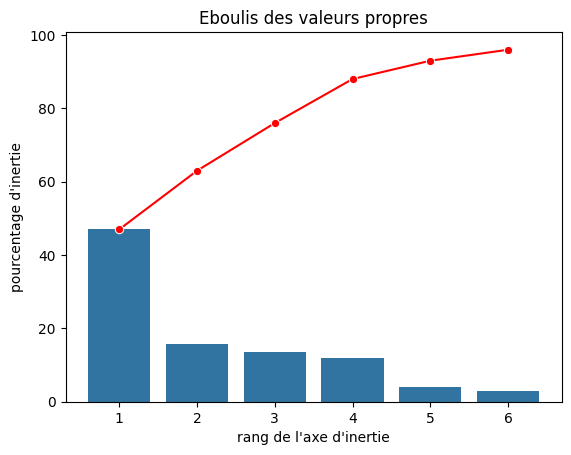

In [24]:
sns.barplot(x=x_list, y=scree)
sns.lineplot(x=x_list,y=scree_cum,c="red",marker="o")
plt.title("Eboulis des valeurs propres")
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.show()

## 3.4 Composantes
Interessons nous maintenant aux composantes

In [25]:
pcs = pca.components_
pcs

array([[ 0.23229081, -0.45303568, -0.08449592,  0.44865413,  0.33114918,
         0.4643896 ,  0.08103545,  0.4477559 ],
       [-0.1385512 ,  0.09570881, -0.50590131,  0.11946397,  0.56702258,
        -0.14819996, -0.55994188, -0.21076734],
       [-0.2329107 , -0.18131195,  0.74959103,  0.02578145,  0.09797129,
         0.00162489, -0.57772613,  0.08341881],
       [ 0.84456256,  0.17345083, -0.00374152, -0.00379675, -0.2511345 ,
        -0.03195603, -0.43707483,  0.0384231 ],
       [-0.1019438 ,  0.10374663,  0.04280049,  0.7043421 , -0.33049795,
         0.25476797, -0.03959608, -0.552459  ],
       [-0.24178329, -0.28083669, -0.34571373, -0.38205031, -0.44706348,
         0.52232025, -0.35266466,  0.01160229]])

Faisons maintenant un affichage pandas

In [26]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,0.232291,-0.453036,-0.084496,0.448654,0.331149,0.464390,0.081035,0.447756
1,-0.138551,0.095709,-0.505901,0.119464,0.567023,-0.148200,-0.559942,-0.210767
2,-0.232911,-0.181312,0.749591,0.025781,0.097971,0.001625,-0.577726,0.083419
3,0.844563,0.173451,-0.003742,-0.003797,-0.251135,-0.031956,-0.437075,0.038423
4,-0.101944,0.103747,0.042800,0.704342,-0.330498,0.254768,-0.039596,-0.552459
5,-0.241783,-0.280837,-0.345714,-0.382050,-0.447063,0.522320,-0.352665,0.011602


Rendons un peu plus clair notre dataframe

In [30]:
pcs.columns=features
pcs.index=[f"F{i}" for i in x_list]
pcs.round(2)

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations
F1,0.23,-0.45,-0.08,0.45,0.33,0.46,0.08,0.45
F2,-0.14,0.10,-0.51,0.12,0.57,-0.15,-0.56,-0.21
F3,-0.23,-0.18,0.75,0.03,0.10,0.00,-0.58,0.08
F4,0.84,0.17,-0.00,-0.00,-0.25,-0.03,-0.44,0.04
F5,-0.10,0.10,0.04,0.70,-0.33,0.25,-0.04,-0.55
F6,-0.24,-0.28,-0.35,-0.38,-0.45,0.52,-0.35,0.01


La formule de calcul de la premiere composante `F1` serait  :

`F1 = (0.23*inscription) + (-0.45*progression) ... + (0.45*nbEvaluations)`

Dans certains cas on preferera l'affichage suivant du dataframe

In [31]:
pcs.T

,F1,F2,F3,F4,F5,F6
inscription,0.232291,-0.138551,-0.232911,0.844563,-0.101944,-0.241783
progression,-0.453036,0.095709,-0.181312,0.173451,0.103747,-0.280837
moyenneDeClasse,-0.084496,-0.505901,0.749591,-0.003742,0.042800,-0.345714
duree,0.448654,0.119464,0.025781,-0.003797,0.704342,-0.382050
difficulte,0.331149,0.567023,0.097971,-0.251135,-0.330498,-0.447063
nbChapitres,0.464390,-0.148200,0.001625,-0.031956,0.254768,0.522320
ratioQuizEvaluation,0.081035,-0.559942,-0.577726,-0.437075,-0.039596,-0.352665
nbEvaluations,0.447756,-0.210767,0.083419,0.038423,-0.552459,0.011602


Pour une représentation visuelle on aurait : 

<Axes: >

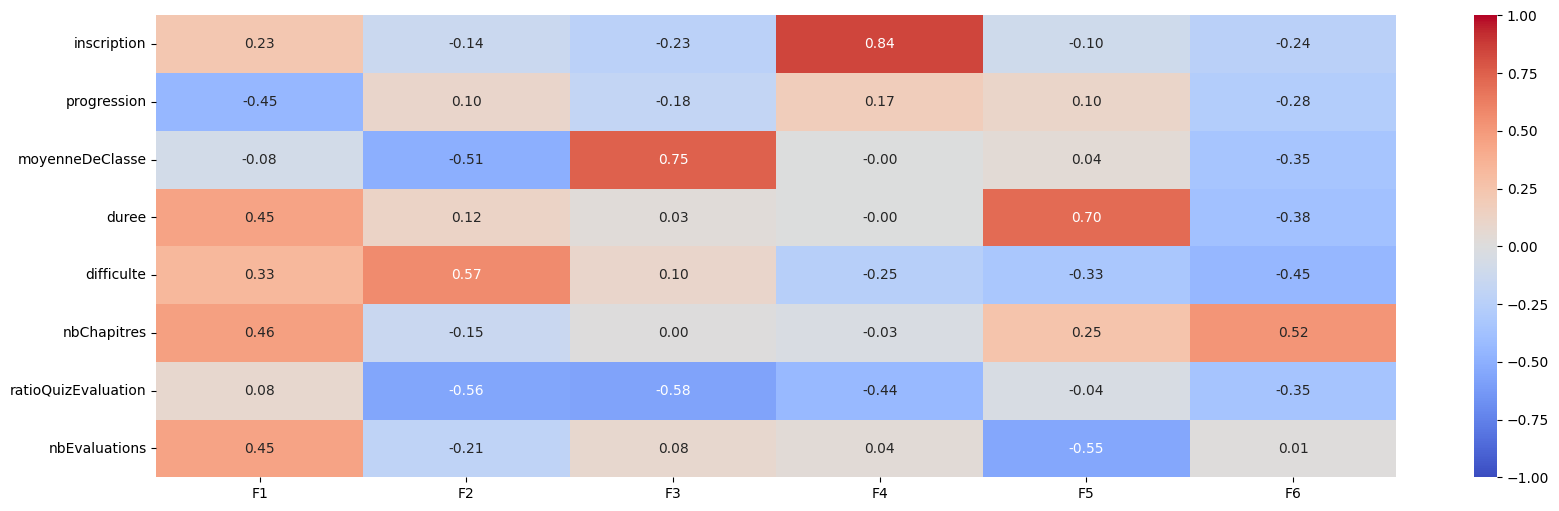

In [34]:
fig,ax=plt.subplots(figsize=(20,6))
sns.heatmap(pcs.T,vmin=-1,vmax=1,annot=True,cmap="coolwarm",fmt="0.2f")

## 3.5. Graphe des corrélations

Nous allons commencer par définir nos axes x,y qui correspondent aux deux premières composantes

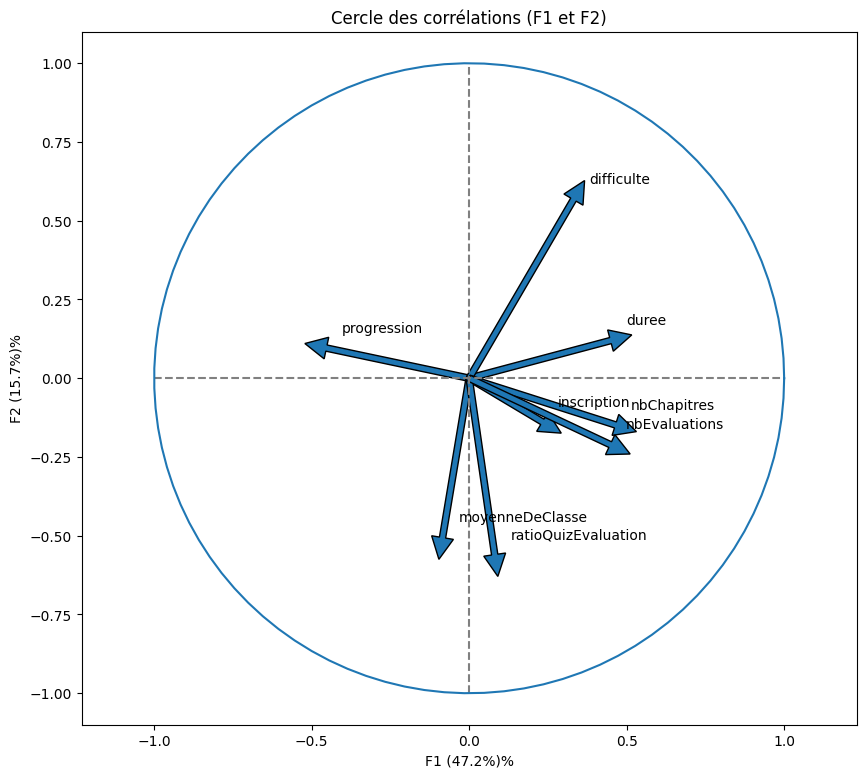

In [78]:
# Les axes de PC1 et PC2
x, y = 0, 1

# graphique

# initialisation du graphique et des axes
fig, ax = plt.subplots(figsize=(10, 9))


# iteration sur chaque feature
for i in range(0, pcs.shape[1]):
    # dessin de la flêche de la ième feature
    # x,y = (0,0) pour commencer la flêche à l'origine du repère
    # pcs[x,i] correspond à la valeur de PC1 pour la ième feature
    # pcs[y,i] correspond à la valeur de PC2 pour la ième feature
    ax.arrow(
        x=0,
        y=0,
        dx=pcs.iloc[x, i],
        dy=pcs.iloc[y, i],
        head_width=0.07,
        head_length=0.07,
        width=0.02,
    )

    # texte mentionnant le nom de la feature
    # x,y les coordonnées du texte
    # s le texte (nom de la feature)
    plt.text(x=pcs.iloc[x, i]+0.05, y=pcs.iloc[y, i]+0.05, s=pcs.columns[i])

# axe horizontale
plt.plot([-1, 1], [0, 0], color="grey", ls="--")
# axe verticale
plt.plot([0, 0], [-1, 1], color="grey", ls="--")


# Nom des axes avec leurs pourcentages de variance expliquée
plt.xlabel(f"F{x+1} ({exp_var_ratio[x]:.1%})%")
plt.ylabel(f"F{y+1} ({exp_var_ratio[y]:.1%})%")

# Le titre du texte
plt.title(f"Cercle des corrélations (F{x+1} et F{y+1})")

# Le cercle
# definissons les angles partant de 0 à 2pi avec 100 points
theta = np.linspace(start=0, stop=2 * np.pi, num=100)
# Rayon
r = 1

# Calculs des coordonnées
xaxis = r * np.cos(theta)
yaxis = r * np.sin(theta)

# traçage du cercle
plt.plot(xaxis, yaxis)

# pour garder la forme ronde
plt.axis("equal")

# affichage
plt.show()

In [81]:
def correlation_graph(x_y,pcs,exp_var_ratio):
    x,y=x_y

    fig,ax=plt.subplots(figsize=(10,9))

    for i in range(0,pcs.shape[1]):
        plt.arrow(0,0,pcs.iloc[x,i],pcs.iloc[y,i],head_width=0.07,head_length=0.07,width=0.02)
        plt.text(pcs.iloc[x, i]+0.05, pcs.iloc[y, i]+0.05,pcs.columns[i])


    plt.plot([-1,1],[0,0],color='grey',ls='--')
    plt.plot([0,0],[-1,1],color='grey',ls='--')

    plt.xlabel(f"F{x+1} ({exp_var_ratio[x]:.1%})%")
    plt.ylabel(f"F{y+1} ({exp_var_ratio[y]:.1%})%")


    plt.title(f"Cercle des corrélations de (F{x+1} et F{y+1})")

    theta = np.linspace(0,2*np.pi,100)
    plt.plot(np.cos(theta),np.sin(theta))
    plt.axis('equal')

    plt.show()

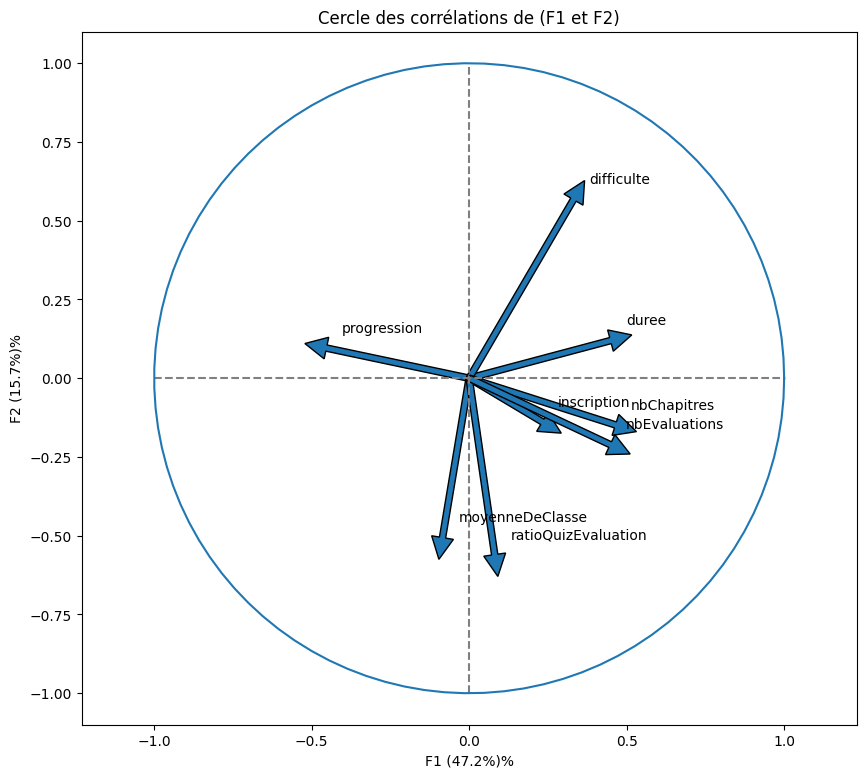

In [82]:
correlation_graph(x_y=(0,1),pcs=pcs,exp_var_ratio=exp_var_ratio)

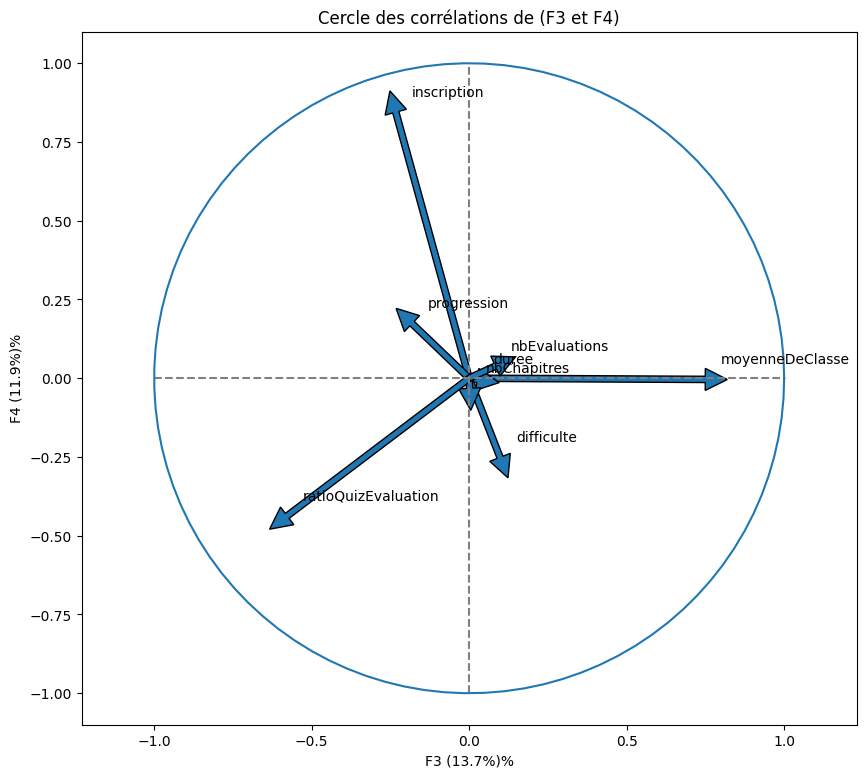

In [84]:
correlation_graph(x_y=(2,3),pcs=pcs,exp_var_ratio=exp_var_ratio)

## 3.6 Projections
Nous allons maintenant effectuer la projection de nos individus sur les plans factoriels

In [108]:
X_proj = pca.transform(X_Scaled)
X_proj[:5]

array([[ 0.22107277,  1.06394473,  0.3874128 , -1.63322222, -0.61683984,
        -0.70983399],
       [ 0.88754323,  0.03499815, -0.56814276, -1.42793746, -0.52608729,
         1.10258485],
       [-2.95501419,  0.11477732, -0.3232466 , -0.29987584,  1.30771945,
        -0.40701673],
       [-1.69361161,  1.07862307,  3.17074995,  0.40249607,  0.05356553,
         0.12275527],
       [-1.86989322, -1.7847995 , -0.87896007, -0.9500123 , -0.08170767,
        -0.19571633]])

In [109]:
def display_factorial_planes(X_projected,x_y,pca=None,labels=None,clusters=None,alpha=1,figsize=[10,8],marker="."):
    """_summary_
    Affiche la projection des individus

    Args:
        X_projected ( np.array, pd.DataFrame, list of list): la matrice des points projetés
        x_y (list ou tuple): le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
        pca (sklearn.decomposition.PCA, optional):  un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante. Defaults to None.
        labels (list ou tuple, optional): les labels des individus à projeter. Defaults to None.
        clusters (list ou tuple, optional): la liste des clusters auquel appartient chaque individu. Defaults to None.
        alpha (int, optional): paramètre de transparence, 0=100% transparent, 1=0% transparent,. Defaults to 1.
        figsize (list ou tuple, optional): couple width, height qui définit la taille de la figure en inches. Defaults to [10,8].
        marker (str, optional): le type de marker utilisé pour représenter les individus. Defaults to ".".
    """

    # Transforme X_projected en array numpy
    X_ = np.array(X_projected)

    # On assure une valeur a figsize si non donnée
    figsize= figsize or (7,6)

    # On gère les labels
    if labels is None:
        labels = []
    try:
        len(labels)
    except Exception as e:
        raise e

    # On verifie la variable axis
    if not len(x_y)==2:
        raise AttributeError("2 axes sont demandées")
    if max(x_y) >= X_.shape[1] :
        raise AttributeError("La variable axis n'est pas bonne")

    # On définit x et y
    x,y=x_y

    # Initialisation de la figure
    fig,ax= plt.subplots(1,1,figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c=None if clusters is None else clusters

    # On dessine les points
    sns.scatterplot(data=None,x=X_[:,x],y=X_[:,y],hue=c)

    # Si pca fournie , on peut calculer le % de variance de chaque axe

    if pca:
        v1, v2 = [f"{pca.explained_variance_ratio_[k]:.0%}%" for k in [x,y]]
    else:
        v1=v2=''

    # Nom des axes ave le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:,x]).max() *1.1
    y_max = np.abs(X_[:,y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max,right=x_max)
    ax.set_ylim(bottom=-y_max,top=y_max)

    # Affichage des lignes horizontales
    plt.plot([-x_max,x_max],[0,0],color='grey',alpha=0.8)
    plt.plot([0, 0], [-y_max, y_max], color="grey", alpha=0.8)

    # Affichage des labels des points
    if len(labels):
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x,_y+0.05,labels[i],fontsize='14',ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

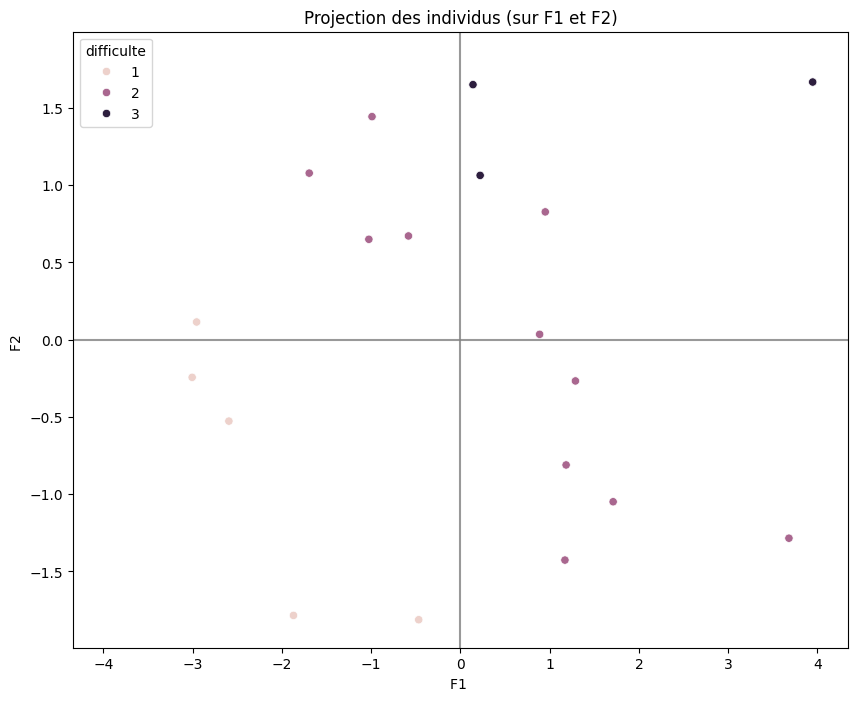

In [110]:
x_y=[0,1]
display_factorial_planes(X_proj,x_y,clusters=df['difficulte'])

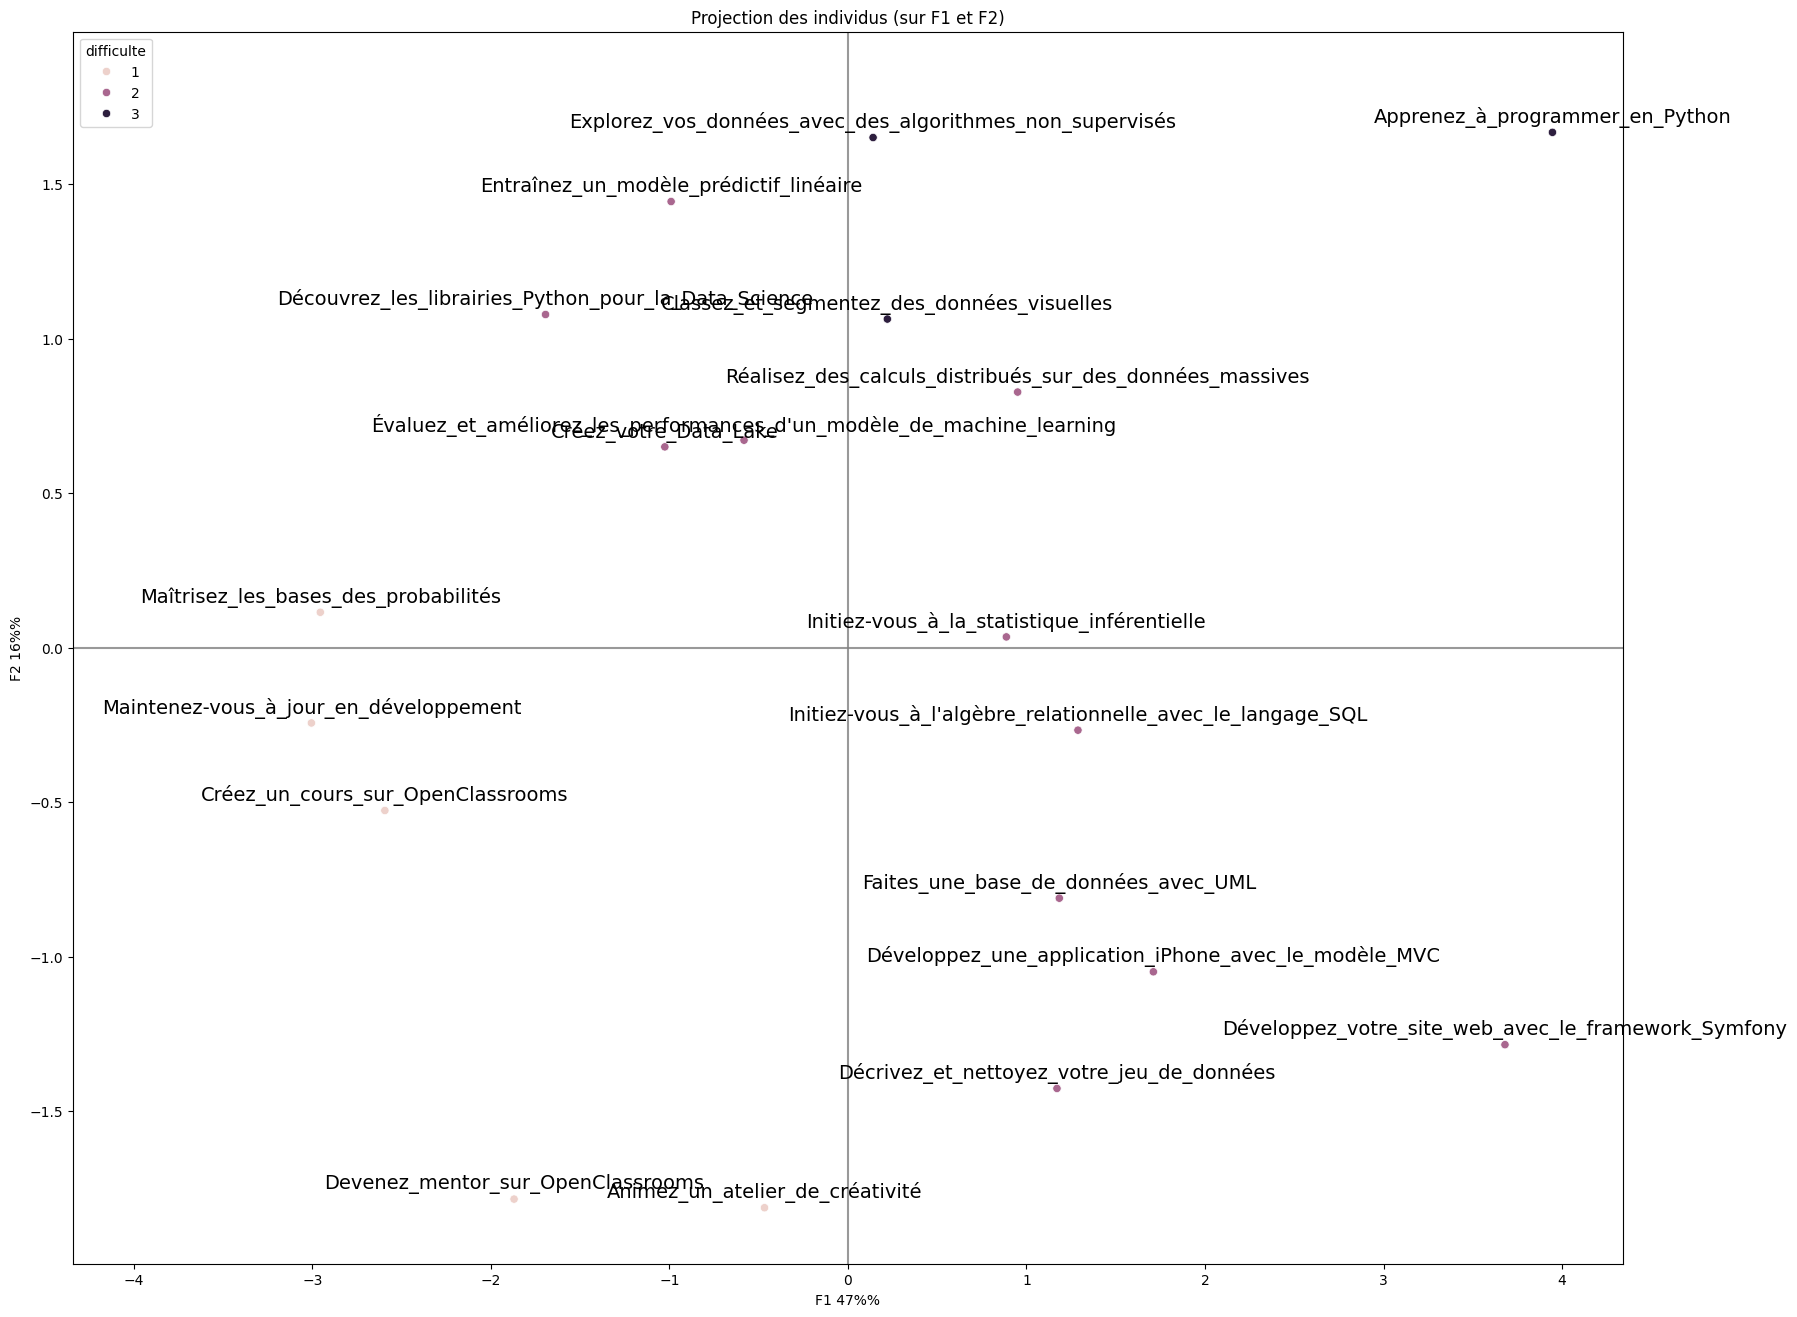

In [111]:
x_y=[0,1]
display_factorial_planes(
    X_proj,
    x_y,
    pca,
    labels=names,
    figsize=(20, 16),
    clusters=df["difficulte"],
    marker="o",
)

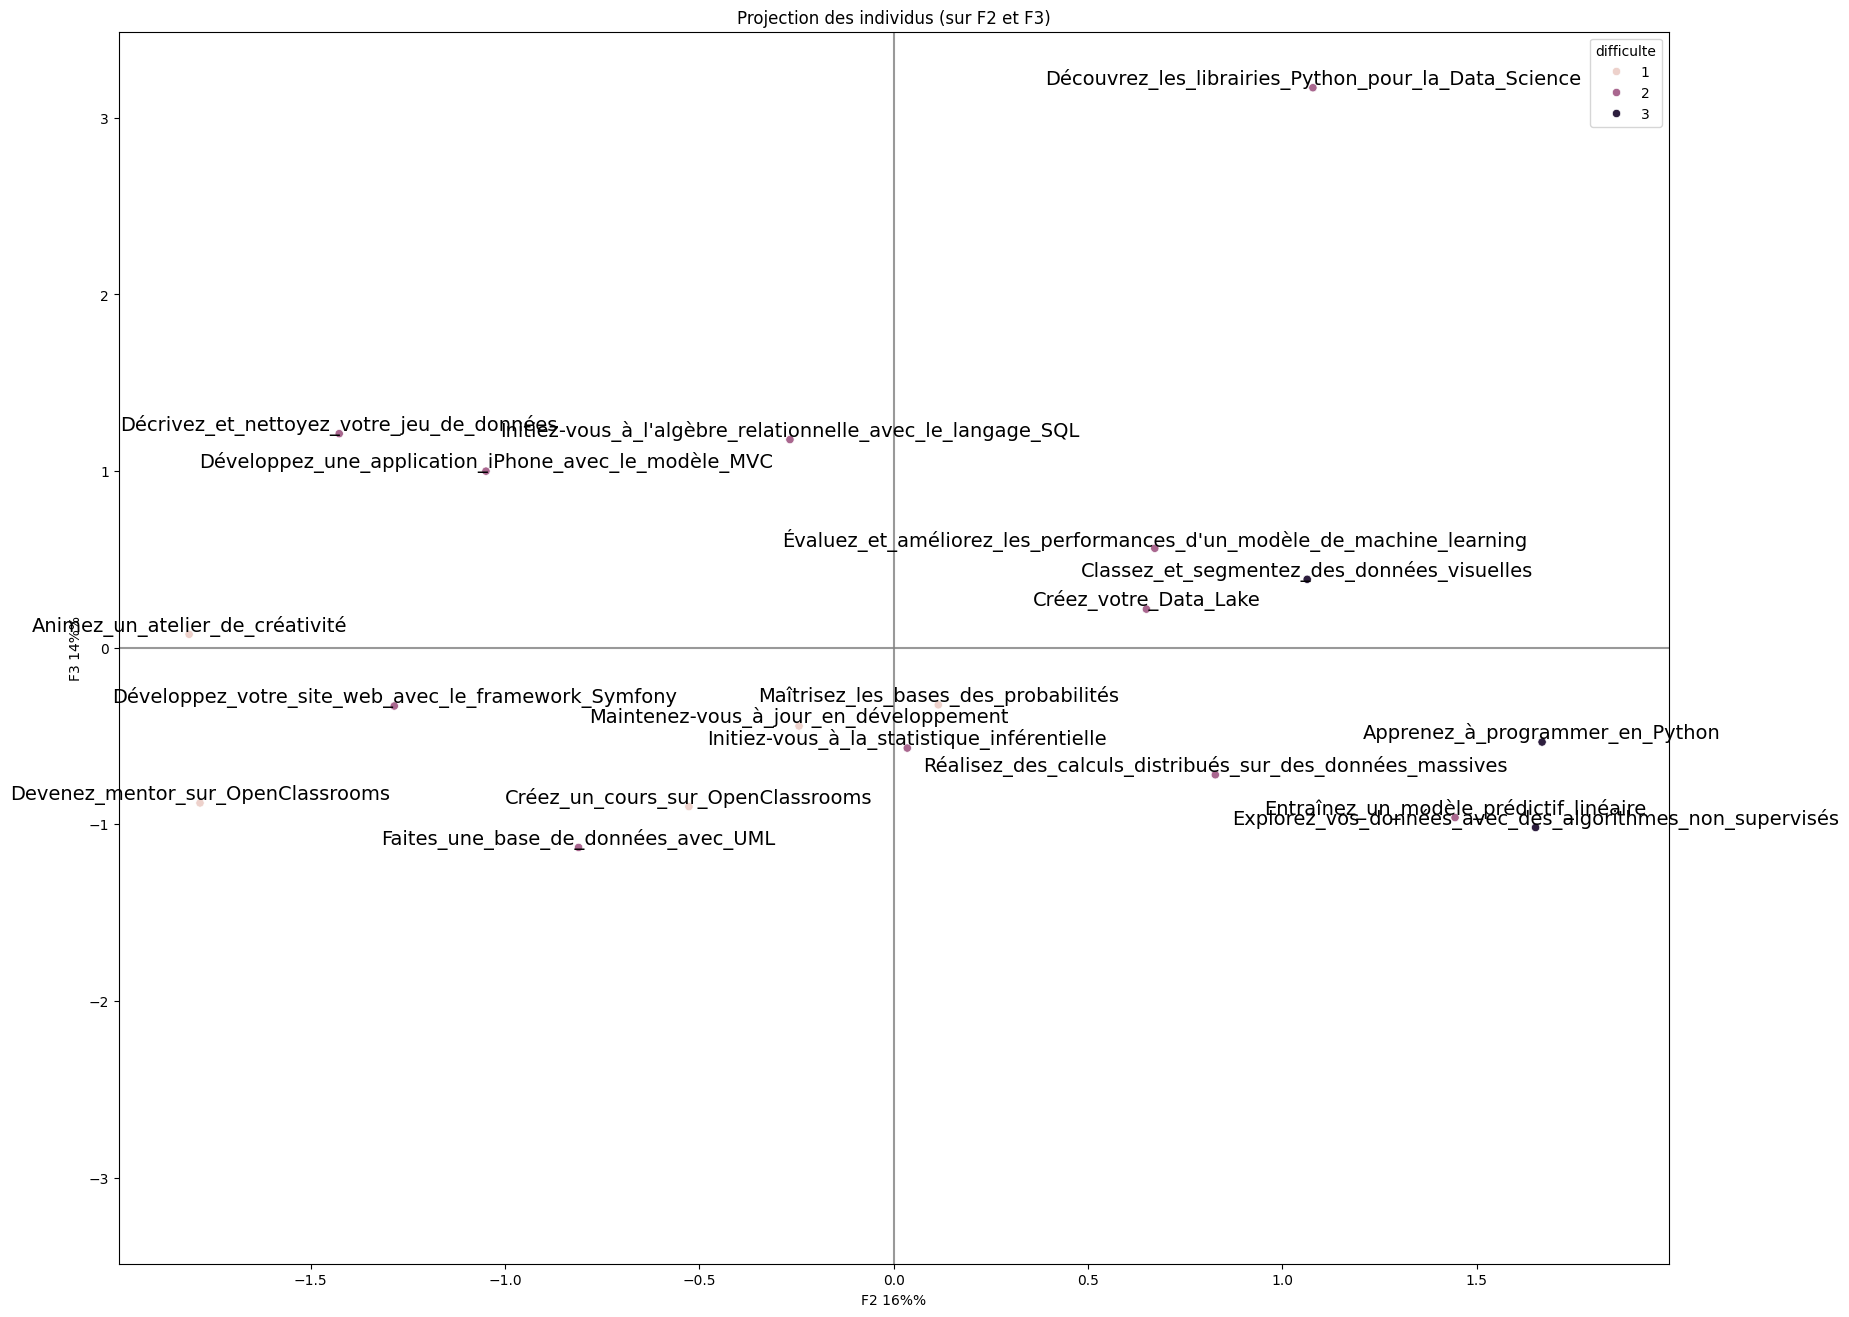

In [112]:
x_y = 1, 2
display_factorial_planes(
    X_proj,
    x_y,
    pca,
    labels=names,
    figsize=(20, 16),
    clusters=df["difficulte"],
    marker="o",
)